In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# A. Import and Prepare Data (From Phase 1)

Idea predict whether the spreading of COVID-19 in one country affect its adjacent coutries or not.

In [5]:
data_path = os.path.join(data_dir, 'owid-covid-data.csv')
df = pd.read_csv(data_path)

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163554,ZWE,Africa,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163555,ZWE,Africa,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163556,ZWE,Africa,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
163557,ZWE,Africa,Zimbabwe,2022-02-20,233352.0,128.0,281.571,5386.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [7]:
df["new_cases_smoothed"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
163554    222.571
163555    259.429
163556    275.000
163557    281.571
163558    281.143
Name: new_cases_smoothed, Length: 163559, dtype: float64

## A.1 Drop unnecessary columns

Some columns might not be needed to analyze the date, so they were dropped.

In [8]:
dropped_df = df.drop(columns=["iso_code", "continent",
                              "total_cases_per_million", "new_cases_per_million", "new_cases_smoothed_per_million",
                              "total_deaths_per_million","new_deaths_per_million","new_deaths_smoothed_per_million",
                              "reproduction_rate","icu_patients","icu_patients_per_million",
                              "hosp_patients","hosp_patients_per_million","weekly_icu_admissions", "weekly_icu_admissions_per_million",
                              "weekly_hosp_admissions","weekly_hosp_admissions_per_million","total_tests_per_thousand", "new_tests_per_thousand", "tests_units",
                              "new_tests_smoothed","new_tests_smoothed_per_thousand","new_vaccinations", "total_vaccinations_per_hundred",
                              "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred", "new_vaccinations_smoothed_per_million",
                              "new_people_vaccinated_smoothed","new_people_vaccinated_smoothed_per_hundred","cardiovasc_death_rate","diabetes_prevalence",
                              "female_smokers","male_smokers","handwashing_facilities","hospital_beds_per_thousand","life_expectancy", "human_development_index",
                              "excess_mortality_cumulative_absolute","excess_mortality_cumulative","excess_mortality","excess_mortality_cumulative_per_million","aged_65_older","aged_70_older", 
                              "tests_per_case", "extreme_poverty", "gdp_per_capita", "median_age"])
dropped_df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index,population,population_density
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163554,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,NaN,NaN,0.0672,7795362.0,4331082.0,3362638.0,101642.0,8448.0,NaN,15092171.0,42.729
163555,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,NaN,2043572.0,0.0754,7810556.0,4336161.0,3367921.0,106474.0,9263.0,NaN,15092171.0,42.729
163556,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,NaN,NaN,0.0853,7820885.0,4338919.0,3371563.0,110403.0,9628.0,NaN,15092171.0,42.729
163557,Zimbabwe,2022-02-20,233352.0,128.0,281.571,5386.0,0.0,1.714,NaN,NaN,0.0935,7823894.0,4340412.0,3372616.0,110866.0,9447.0,NaN,15092171.0,42.729


### A.1.1 Drop error data

Some date in the table might not be appropriated (such as new cases < 0). Those data were dropped from the table.

In [9]:
dropped_df.isna().sum()

location                          0
date                              0
total_cases                    3005
new_cases                      3046
new_cases_smoothed             4197
total_deaths                  20737
new_deaths                    20556
new_deaths_smoothed           20686
new_tests                     97124
total_tests                   95228
positive_rate                 85699
total_vaccinations           119608
people_vaccinated            121731
people_fully_vaccinated      124360
total_boosters               147011
new_vaccinations_smoothed     81264
stringency_index              35266
population                     1063
population_density            18089
dtype: int64

In [10]:
dropped_df.drop(dropped_df[dropped_df["new_deaths"] < 0].index, inplace=True)
dropped_df.drop(dropped_df[dropped_df["new_cases"] < 0].index, inplace=True)
dropped_df.drop(dropped_df[dropped_df["new_deaths_smoothed"] < 0].index, inplace=True)
dropped_df.drop(dropped_df[dropped_df["new_cases_smoothed"] < 0].index, inplace=True)

In [11]:
dropped_df.drop(dropped_df[dropped_df["population"].isna()].index, inplace=True)
dropped_df.drop(dropped_df[dropped_df["population_density"].isna()].index, inplace=True)

## A.2 Fill NaN

In [12]:
filNaN_df = dropped_df.copy().reset_index()
filNaN_df.drop(columns=['index'], inplace=True)

### A.2.1 Patch NaN for some specific data in the columns
Patch NaN that occur in the first row of each location in the dataset with 0.

In [13]:
location_first_index = {}
prev_loc = ""

for i in range(0,len(filNaN_df["location"])):
  if(filNaN_df["location"][i] != prev_loc):
    if(pd.isna(filNaN_df["total_cases"][i])):
      filNaN_df.loc[i, 'total_cases'] = 0
    if(pd.isna(filNaN_df["total_deaths"][i])):
      filNaN_df.loc[i, 'total_deaths'] = 0
    if(pd.isna(filNaN_df["total_tests"][i])):
      filNaN_df.loc[i, 'total_tests'] = 0
    if(pd.isna(filNaN_df["total_vaccinations"][i])):
      filNaN_df.loc[i, 'total_vaccinations'] = 0
    if(pd.isna(filNaN_df["people_vaccinated"][i])):
      filNaN_df.loc[i, 'people_vaccinated'] = 0
    if(pd.isna(filNaN_df["people_fully_vaccinated"][i])):
      filNaN_df.loc[i, 'people_fully_vaccinated'] = 0
    if(pd.isna(filNaN_df["total_boosters"][i])):
      filNaN_df.loc[i, 'total_boosters'] = 0
    if(pd.isna(filNaN_df["stringency_index"][i])):
      filNaN_df.loc[i, 'stringency_index'] = 0
    if(pd.isna(filNaN_df["positive_rate"][i])):
      filNaN_df.loc[i, 'positive_rate'] = 0
    if(pd.isna(filNaN_df["new_cases_smoothed"][i])):
      filNaN_df.loc[i, 'new_cases_smoothed'] = 0
    if(pd.isna(filNaN_df["new_deaths_smoothed"][i])):
      filNaN_df.loc[i, 'new_deaths_smoothed'] = 0
    if(pd.isna(filNaN_df["new_vaccinations_smoothed"][i])):
      filNaN_df.loc[i, 'new_vaccinations_smoothed'] = 0
    prev_loc = filNaN_df["location"][i]

### A.2.1 Patch NaN in specific columns with 0
These columns are patched with 0 because the the unknown data in the "new" columns cannot be predicted.

In [14]:
filNaN_df["new_cases"].fillna(0,inplace = True) 
filNaN_df["new_deaths"].fillna(0,inplace = True)
filNaN_df["new_tests"].fillna(0,inplace = True)

In [15]:
filNaN_df.isna().sum()

location                          0
date                              0
total_cases                    1551
new_cases                         0
new_cases_smoothed             2445
total_deaths                  15013
new_deaths                        0
new_deaths_smoothed           15088
new_tests                         0
total_tests                   77694
positive_rate                 68486
total_vaccinations           106268
people_vaccinated            108287
people_fully_vaccinated      110646
total_boosters               131845
new_vaccinations_smoothed     71387
stringency_index              19227
population                        0
population_density                0
dtype: int64

### A.2.2 Patch NaN in specific columns with the previous data of that column
If the data is NaN in the following columns, it will be patched with the data from the previous row from that column. (The data were initialized at **A.2.1**)

In [16]:
filNaN_df["total_cases"].fillna(method="ffill",inplace = True)
filNaN_df["total_deaths"].fillna(method="ffill",inplace = True)
filNaN_df["total_tests"].fillna(method="ffill",inplace = True)

In [17]:
filNaN_df["total_vaccinations"].fillna(method="ffill",inplace = True)
filNaN_df["people_vaccinated"].fillna(method="ffill",inplace = True)
filNaN_df["people_fully_vaccinated"].fillna(method="ffill",inplace = True)
filNaN_df["total_boosters"].fillna(method="ffill",inplace = True)
filNaN_df["stringency_index"].fillna(method="ffill",inplace = True)
filNaN_df["positive_rate"].fillna(method="ffill",inplace = True)
filNaN_df["new_cases_smoothed"].fillna(method="ffill",inplace = True)
filNaN_df["new_deaths_smoothed"].fillna(method="ffill",inplace = True)
filNaN_df["new_vaccinations_smoothed"].fillna(method="ffill",inplace = True)

In [18]:
filNaN_df.isna().sum()

location                     0
date                         0
total_cases                  0
new_cases                    0
new_cases_smoothed           0
total_deaths                 0
new_deaths                   0
new_deaths_smoothed          0
new_tests                    0
total_tests                  0
positive_rate                0
total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
total_boosters               0
new_vaccinations_smoothed    0
stringency_index             0
population                   0
population_density           0
dtype: int64

In [19]:
filNaN_df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index,population,population_density
0,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
1,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
2,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
3,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
4,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145048,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,0.0,2030699.0,0.0672,7795362.0,4331082.0,3362638.0,101642.0,8448.0,40.74,15092171.0,42.729
145049,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,0.0,2043572.0,0.0754,7810556.0,4336161.0,3367921.0,106474.0,9263.0,40.74,15092171.0,42.729
145050,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,0.0,2043572.0,0.0853,7820885.0,4338919.0,3371563.0,110403.0,9628.0,40.74,15092171.0,42.729
145051,Zimbabwe,2022-02-20,233352.0,128.0,281.571,5386.0,0.0,1.714,0.0,2043572.0,0.0935,7823894.0,4340412.0,3372616.0,110866.0,9447.0,40.74,15092171.0,42.729


In [20]:
filNaN_df.drop(filNaN_df[filNaN_df["location"] == "World"].index,inplace = True)

In [21]:
filNaN_df = filNaN_df.reset_index()
filNaN_df.drop(columns=['index'], inplace=True)

In [22]:
filNaN_df.isna().sum()

location                     0
date                         0
total_cases                  0
new_cases                    0
new_cases_smoothed           0
total_deaths                 0
new_deaths                   0
new_deaths_smoothed          0
new_tests                    0
total_tests                  0
positive_rate                0
total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
total_boosters               0
new_vaccinations_smoothed    0
stringency_index             0
population                   0
population_density           0
dtype: int64

In [23]:
filNaN_df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations_smoothed,stringency_index,population,population_density
0,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
1,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
2,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
3,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
4,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144286,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,0.0,2030699.0,0.0672,7795362.0,4331082.0,3362638.0,101642.0,8448.0,40.74,15092171.0,42.729
144287,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,0.0,2043572.0,0.0754,7810556.0,4336161.0,3367921.0,106474.0,9263.0,40.74,15092171.0,42.729
144288,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,0.0,2043572.0,0.0853,7820885.0,4338919.0,3371563.0,110403.0,9628.0,40.74,15092171.0,42.729
144289,Zimbabwe,2022-02-20,233352.0,128.0,281.571,5386.0,0.0,1.714,0.0,2043572.0,0.0935,7823894.0,4340412.0,3372616.0,110866.0,9447.0,40.74,15092171.0,42.729


# Insight Extraction

In [24]:
insight_df = filNaN_df.copy()
insight_df = insight_df.drop(columns=["total_deaths","new_tests","total_tests","people_vaccinated","total_vaccinations","total_boosters","population"])
insight_df

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,positive_rate,people_fully_vaccinated,new_vaccinations_smoothed,stringency_index,population_density
0,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
1,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
2,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
3,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
4,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...
144286,Zimbabwe,2022-02-17,232598.0,385.0,222.571,2.0,1.143,0.0672,3362638.0,8448.0,40.74,42.729
144287,Zimbabwe,2022-02-18,233030.0,432.0,259.429,4.0,1.571,0.0754,3367921.0,9263.0,40.74,42.729
144288,Zimbabwe,2022-02-19,233224.0,194.0,275.000,1.0,1.714,0.0853,3371563.0,9628.0,40.74,42.729
144289,Zimbabwe,2022-02-20,233352.0,128.0,281.571,0.0,1.714,0.0935,3372616.0,9447.0,40.74,42.729


In [25]:
normalized_df = insight_df.copy()

location_list = list(normalized_df["location"].drop_duplicates())

max_total_case_each_loc = []
max_new_cases_each_loc = []
max_new_deaths_each_loc = []
max_people_fully_vaccinated_each_loc = []
max_stringency_index_each_loc = []
max_new_cases_smoothed_each_loc = []
max_new_deaths_smoothed_each_loc = []
max_new_vaccinations_smoothed_each_loc = []

for i in range(0,len(location_list)):
  max_total_case_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["total_cases"].max())
  max_new_cases_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["new_cases"].max())
  max_new_deaths_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["new_deaths"].max())
  max_people_fully_vaccinated_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["people_fully_vaccinated"].max())
  max_stringency_index_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["stringency_index"].max())
  max_new_cases_smoothed_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["new_cases_smoothed"].max())
  max_new_deaths_smoothed_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["new_deaths_smoothed"].max())
  max_new_vaccinations_smoothed_each_loc.append(normalized_df[normalized_df["location"] == location_list[i]]["new_vaccinations_smoothed"].max())

dict_data = {
  "location": location_list,
  "total_cases":max_total_case_each_loc,
  "new_cases":max_new_cases_each_loc,
  "new_deaths":max_new_deaths_each_loc,
  "people_fully_vaccinated":max_people_fully_vaccinated_each_loc,
  "stringency_index":max_stringency_index_each_loc,
  "new_cases_smoothed":max_new_cases_smoothed_each_loc,
  "new_deaths_smoothed":max_new_deaths_smoothed_each_loc,
  "new_vaccinations_smoothed":max_new_vaccinations_smoothed_each_loc,
}

max_df = pd.DataFrame(dict_data)

In [26]:
for i in range(0,len(max_df["location"])):
  if(max_df.loc[i, "total_cases"] == 0 or max_df.loc[i, "new_cases"] == 0 or max_df.loc[i, "new_deaths"] == 0 or max_df.loc[i, "people_fully_vaccinated"] == 0 
     or max_df.loc[i, "stringency_index"] == 0 or max_df.loc[i, "new_cases_smoothed"] == 0 or max_df.loc[i, "new_deaths_smoothed"] == 0 or max_df.loc[i, "new_vaccinations_smoothed"] == 0):
    normalized_df = normalized_df.drop(normalized_df[normalized_df["location"] == max_df.loc[i, "location"]].index)
normalized_df = normalized_df.reset_index()

In [27]:
normalized_df = normalized_df.drop(columns=["index"])

In [28]:
normalized_df

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,positive_rate,people_fully_vaccinated,new_vaccinations_smoothed,stringency_index,population_density
0,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
1,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
2,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
3,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
4,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0,8.33,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...
125247,Zimbabwe,2022-02-17,232598.0,385.0,222.571,2.0,1.143,0.0672,3362638.0,8448.0,40.74,42.729
125248,Zimbabwe,2022-02-18,233030.0,432.0,259.429,4.0,1.571,0.0754,3367921.0,9263.0,40.74,42.729
125249,Zimbabwe,2022-02-19,233224.0,194.0,275.000,1.0,1.714,0.0853,3371563.0,9628.0,40.74,42.729
125250,Zimbabwe,2022-02-20,233352.0,128.0,281.571,0.0,1.714,0.0935,3372616.0,9447.0,40.74,42.729


In [29]:
current_location_list = list(normalized_df["location"].drop_duplicates())

In [30]:
for i in current_location_list:
  normalized_df.loc[normalized_df['location'] == i, 'total_cases'] = normalized_df.loc[normalized_df['location'] == i,'total_cases']/float(max_df[max_df["location"] == i]['total_cases'])
  normalized_df.loc[normalized_df['location'] == i, 'new_cases'] = normalized_df.loc[normalized_df['location'] == i, 'new_cases']/float(max_df[max_df["location"] == i]["new_cases"])
  normalized_df.loc[normalized_df['location'] == i, 'new_deaths'] = normalized_df.loc[normalized_df['location'] == i, 'new_deaths']/float(max_df[max_df["location"] == i]["new_deaths"])
  normalized_df.loc[normalized_df['location'] == i, 'people_fully_vaccinated'] = normalized_df.loc[normalized_df['location'] == i, 'people_fully_vaccinated']/float(max_df[max_df["location"] == i]["people_fully_vaccinated"])
  normalized_df.loc[normalized_df['location'] == i, 'stringency_index'] = normalized_df.loc[normalized_df['location'] == i, 'stringency_index']/float(max_df[max_df["location"] == i]["stringency_index"])
  normalized_df.loc[normalized_df['location'] == i, 'new_cases_smoothed'] = normalized_df.loc[normalized_df['location'] == i, 'new_cases_smoothed']/float(max_df[max_df["location"] == i]["new_cases_smoothed"])
  normalized_df.loc[normalized_df['location'] == i, 'new_deaths_smoothed'] = normalized_df.loc[normalized_df['location'] == i, 'new_deaths_smoothed']/float(max_df[max_df["location"] == i]["new_deaths_smoothed"])
  normalized_df.loc[normalized_df['location'] == i, 'new_vaccinations_smoothed'] = normalized_df.loc[normalized_df['location'] == i, 'new_vaccinations_smoothed']/float(max_df[max_df["location"] == i]["new_vaccinations_smoothed"])
normalized_df

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,positive_rate,people_fully_vaccinated,new_vaccinations_smoothed,stringency_index,population_density
0,Afghanistan,2020-02-24,0.000029,0.001542,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.098861,54.422
1,Afghanistan,2020-02-25,0.000029,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.098861,54.422
2,Afghanistan,2020-02-26,0.000029,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.098861,54.422
3,Afghanistan,2020-02-27,0.000029,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.098861,54.422
4,Afghanistan,2020-02-28,0.000029,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.098861,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...
125247,Zimbabwe,2022-02-17,0.995834,0.041916,0.046163,0.018692,0.014521,0.0672,0.996523,0.112640,0.463165,42.729
125248,Zimbabwe,2022-02-18,0.997684,0.047033,0.053807,0.037383,0.019958,0.0754,0.998089,0.123507,0.463165,42.729
125249,Zimbabwe,2022-02-19,0.998514,0.021121,0.057037,0.009346,0.021775,0.0853,0.999168,0.128373,0.463165,42.729
125250,Zimbabwe,2022-02-20,0.999062,0.013936,0.058400,0.000000,0.021775,0.0935,0.999480,0.125960,0.463165,42.729


In [31]:
normalized_df.isna().sum()

location                     0
date                         0
total_cases                  0
new_cases                    0
new_cases_smoothed           0
new_deaths                   0
new_deaths_smoothed          0
positive_rate                0
people_fully_vaccinated      0
new_vaccinations_smoothed    0
stringency_index             0
population_density           0
dtype: int64

In [32]:
date_sort_df = normalized_df.copy()
date_sort_df = date_sort_df.sort_values(by = ["date"])
date_sort_df

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,positive_rate,people_fully_vaccinated,new_vaccinations_smoothed,stringency_index,population_density
3608,Argentina,2020-01-01,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,16.177
75861,Mexico,2020-01-01,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,66.444
75862,Mexico,2020-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,66.444
3609,Argentina,2020-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,16.177
3610,Argentina,2020-01-03,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,16.177
...,...,...,...,...,...,...,...,...,...,...,...,...
83838,New Zealand,2022-02-21,1.0,1.000000,1.000000,0.750000,0.333593,0.0609,1.0,0.464402,0.634579,18.206
26673,Colombia,2022-02-21,1.0,0.081799,0.122013,0.137500,0.190557,0.1440,1.0,0.436934,0.653075,44.223
83117,Netherlands,2022-02-21,1.0,0.094616,0.375147,0.025641,0.081479,0.5790,1.0,0.019231,0.707802,508.544
82399,Nepal,2022-02-21,1.0,0.024572,0.036102,0.006462,0.017791,0.0645,1.0,0.737967,0.495268,204.430


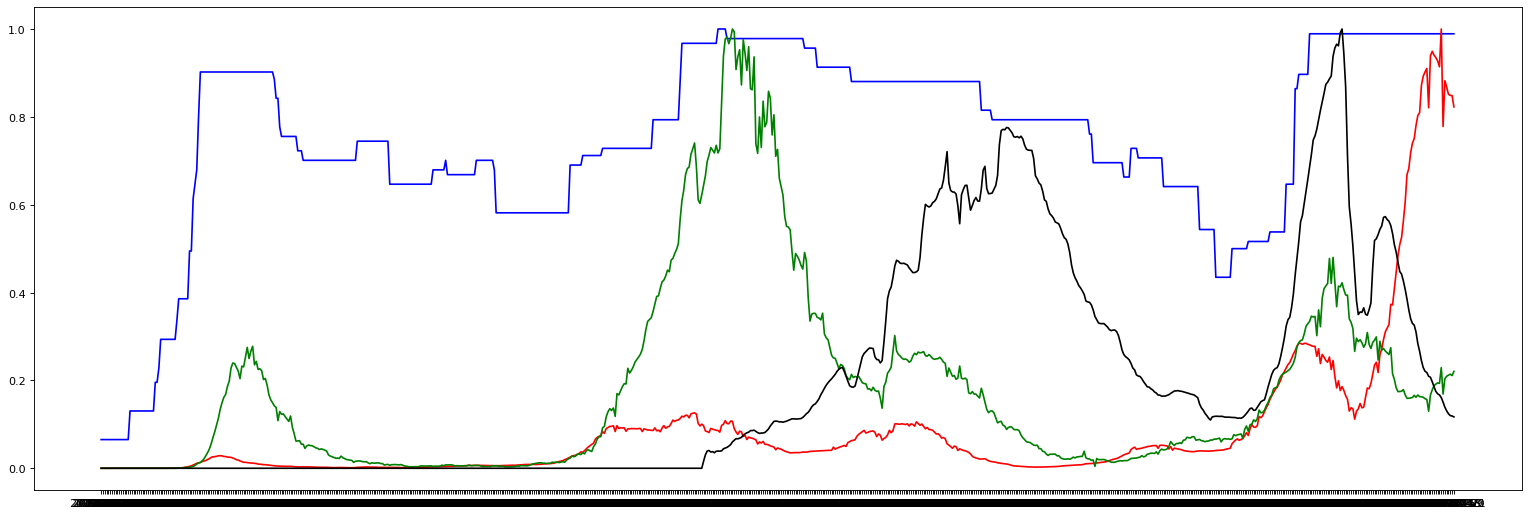

In [33]:
from matplotlib.pyplot import figure

figure(figsize=(24, 8), dpi=80)

plt.plot(date_sort_df[date_sort_df['location'] == "Germany"]["date"],date_sort_df[date_sort_df['location'] == "Germany"]["stringency_index"], color = "blue")
plt.plot(date_sort_df[date_sort_df['location'] == "Germany"]["date"],date_sort_df[date_sort_df['location'] == "Germany"]["new_cases_smoothed"], color = "red")
plt.plot(date_sort_df[date_sort_df['location'] == "Germany"]["date"],date_sort_df[date_sort_df['location'] == "Germany"]["new_deaths_smoothed"], color = "green")
#plt.plot(date_sort_df[date_sort_df['location'] == "Germany"]["date"],date_sort_df[date_sort_df['location'] == "Germany"]["people_fully_vaccinated"], color = "purple")
plt.plot(date_sort_df[date_sort_df['location'] == "Germany"]["date"],date_sort_df[date_sort_df['location'] == "Germany"]["new_vaccinations_smoothed"], color = "black")
plt.show()

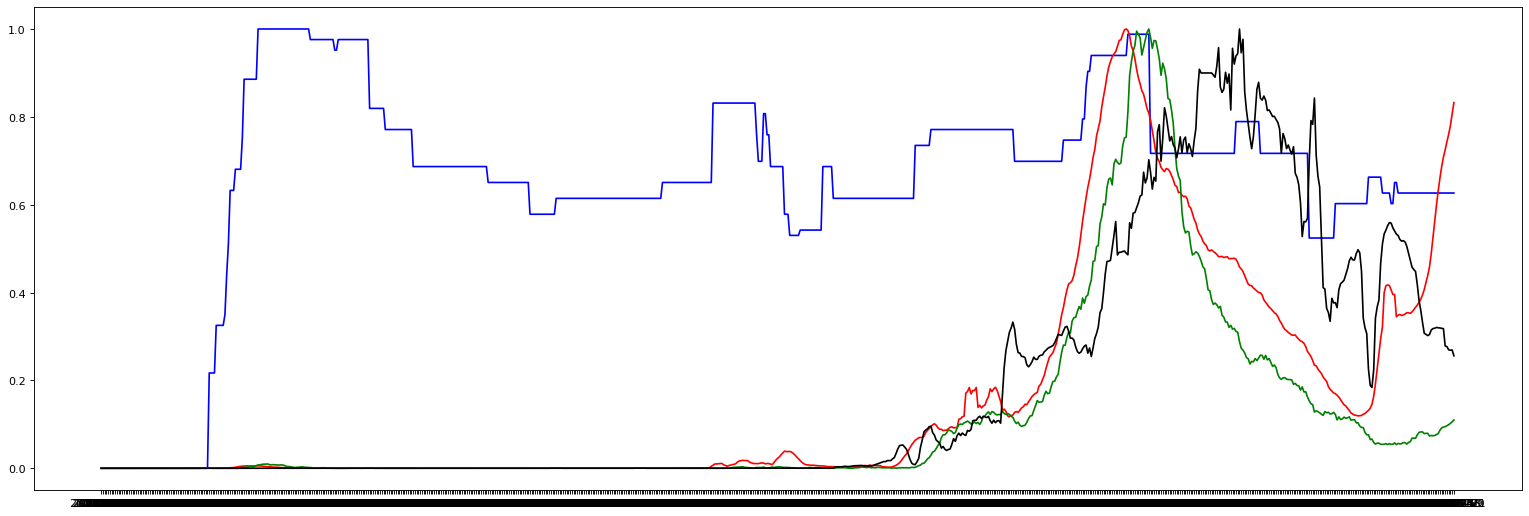

In [34]:

figure(figsize=(24, 8), dpi=80)

plt.plot(date_sort_df[date_sort_df['location'] == "Thailand"]["date"],date_sort_df[date_sort_df['location'] == "Thailand"]["stringency_index"], color = "blue")
plt.plot(date_sort_df[date_sort_df['location'] == "Thailand"]["date"],date_sort_df[date_sort_df['location'] == "Thailand"]["new_cases_smoothed"], color = "red")
plt.plot(date_sort_df[date_sort_df['location'] == "Thailand"]["date"],date_sort_df[date_sort_df['location'] == "Thailand"]["new_deaths_smoothed"], color = "green")
#plt.plot(date_sort_df[date_sort_df['location'] == "Thailand"]["date"],date_sort_df[date_sort_df['location'] == "Thailand"]["people_fully_vaccinated"], color = "purple")
plt.plot(date_sort_df[date_sort_df['location'] == "Thailand"]["date"],date_sort_df[date_sort_df['location'] == "Thailand"]["new_vaccinations_smoothed"], color = "black")
plt.show()

In [35]:
import random


n = 5
for i in current_location_list:
  if(random.randint(0,100) > 20):
    continue;
  
  figure(figsize=(24, 8), dpi=300)
  plt.title(i)

  plt.plot(date_sort_df[date_sort_df['location'] == i]["date"],date_sort_df[date_sort_df['location'] == i]["stringency_index"], color = "blue")
  plt.plot(date_sort_df[date_sort_df['location'] == i]["date"],date_sort_df[date_sort_df['location'] == i]["new_cases_smoothed"], color = "red")
  plt.plot(date_sort_df[date_sort_df['location'] == i]["date"],date_sort_df[date_sort_df['location'] == i]["new_deaths_smoothed"], color = "green")
#  plt.plot(date_sort_df[date_sort_df['location'] == i]["date"],date_sort_df[date_sort_df['location'] == i]["people_fully_vaccinated"], color = "purple")
  plt.plot(date_sort_df[date_sort_df['location'] == i]["date"],date_sort_df[date_sort_df['location'] == i]["new_vaccinations_smoothed"], color = "black")
  plt.show()

  n -= 1
  if n == 0:
    break;  

Output hidden; open in https://colab.research.google.com to view.

# Insight Gain:

For most locations:

- The trend of new cases is similar to the trend of new deaths.
- The stringency index starts from the very high. Then, as time goes on, the stringency index is changed similar to the trend of new cases and new deaths.
- The number of people who are fully vaccinated does not indicate the number of new cases, but it indicates the number of new deaths. 

# Phase 2: Make a model


##Linear Regression predicting the trend of new deaths for all location


- **What to predict?:** The trend of new deaths for the next day.
- **Reason:** With the decrement of the number of population, there will be an impact to the societies in various ways. 
- **AI Model:** Linear Regression


In [65]:
data_df = normalized_df.copy()
data_df = data_df.drop(columns = ['new_cases', 'new_deaths', 'population_density', 'stringency_index', 'positive_rate'])
data_df

,location,date,total_cases,new_cases_smoothed,new_deaths_smoothed,people_fully_vaccinated,new_vaccinations_smoothed
0,Afghanistan,2020-02-24,0.000029,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,2020-02-25,0.000029,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,2020-02-26,0.000029,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,2020-02-27,0.000029,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,2020-02-28,0.000029,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
125247,Zimbabwe,2022-02-17,0.995834,0.046163,0.014521,0.996523,0.112640
125248,Zimbabwe,2022-02-18,0.997684,0.053807,0.019958,0.998089,0.123507
125249,Zimbabwe,2022-02-19,0.998514,0.057037,0.021775,0.999168,0.128373
125250,Zimbabwe,2022-02-20,0.999062,0.058400,0.021775,0.999480,0.125960


In [66]:
feature_duration_in_day = 7
current_location = data_df.loc[0, 'location']

tmp_X = data_df.drop(columns = ['new_deaths_smoothed'])
tmp_y = data_df['new_deaths_smoothed']

X = []
y = []

i = feature_duration_in_day

while i < len(data_df):
  if data_df.loc[i, 'location'] == current_location: 
    X.append(tmp_X[i - feature_duration_in_day:i].drop(columns=['location', 'date']).to_numpy().flatten())
    y.append(tmp_y[i])
    i += 1
  else:
    current_location = data_df.loc[i, 'location']
    i += feature_duration_in_day - 1

In [67]:
type(X[0])

numpy.ndarray

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.30)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, 
    random_state=42,
    test_size=0.50)

print(f'Training set: {np.shape(X_train)}, {np.shape(y_train)}')
print(f'Validation set: {np.shape(X_valid)}, {np.shape(y_valid)}')
print(f'Test set: {np.shape(X_test)}, {np.shape(y_test)}')

Training set: (86940, 28), (86940,)
Validation set: (18631, 28), (18631,)
Test set: (18630, 28), (18630,)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score


scaler = RobustScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)

print(f'Mean: {np.mean(scaled_X_train, axis=0)}')
print(f'Std: {np.std(scaled_X_train, axis=0)}')

Mean: [0.15744715 0.53331023 0.59525586 0.63016959 0.15746155 0.53268577
 0.59529853 0.6298918  0.15661729 0.53220949 0.58697062 0.62818535
 0.15645511 0.53223055 0.57920295 0.62442272 0.15611622 0.53129787
 0.57622898 0.62345064 0.15567374 0.53057267 0.56962103 0.62008785
 0.15538242 0.53038782 0.56507834 0.61724456]
Std: [0.60396672 1.33652687 0.94266825 0.98835885 0.6039097  1.33376167
 0.94261756 0.98801974 0.60264419 1.33176082 0.92648857 0.9867339
 0.60231665 1.33089151 0.91136919 0.98276808 0.60204003 1.32933253
 0.9038243  0.98250771 0.60220049 1.32603328 0.89063671 0.97909602
 0.60249686 1.324643   0.8807874  0.9758069 ]


Text(0, 0.5, 'STD')

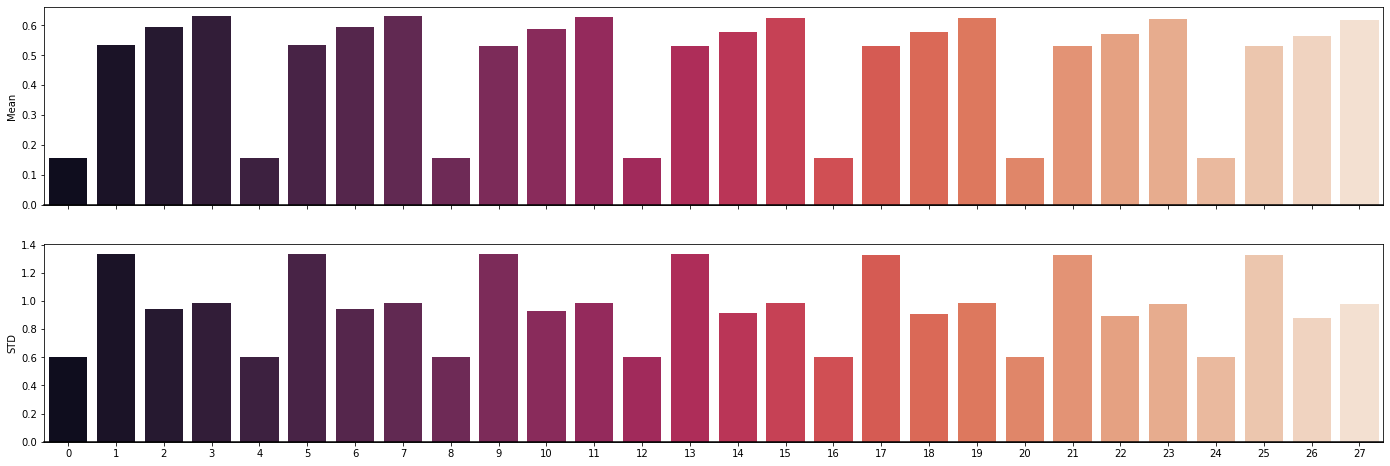

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 8), sharex=True)

sns.barplot(x=[i for i in range(0,len(np.mean(scaled_X_train, axis=0)))], y=np.mean(scaled_X_train, axis=0), palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mean")

sns.barplot(x=[i for i in range(0,len(np.std(scaled_X_train, axis=0)))], y=np.std(scaled_X_train, axis=0), palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("STD")

In [71]:
model = LinearRegression()
model.fit(scaled_X_train, y_train)

LinearRegression()

In [72]:
scaled_X_valid = scaler.transform(X_valid)

y_hat_valid = model.predict(scaled_X_valid)

In [73]:

print('Validation Set')
print(f'MSE: {mean_squared_error(y_true=y_valid, y_pred=y_hat_valid):.4f}')

Validation Set
MSE: 0.0322


In [74]:
scaled_X_test = scaler.transform(X_test)

y_hat_test = model.predict(scaled_X_test)

In [75]:
print('Test Set')
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=y_hat_test):.4f}')

Test Set
MSE: 0.0330


In [76]:
print(np.shape(X_test))
print(np.shape(y_test))
len(X_test)

(18630, 28)
(18630,)


18630

In [85]:
feature = ['total case','new_cases_smoothed','people_fully_vaccinated','new_vaccinations_smoothed']

#for i in range(0, feature_duration_in_day):
#  for j in range(0, len(feature)):
#    figure(figsize=(24, 8), dpi=300)
#    to_visualize_X = []
#    for k in range(len(X_test)):
#      to_visualize_X.append(X_test[k][j])
#    x1, y1 = zip(*sorted(zip(to_visualize_X, y_hat_test)))
#    plt.plot(x1, y1, color="blue")
#    plt.scatter(to_visualize_X, y_test, color="black")
#    plt.title(str(i) + " - " + feature[j])
#    plt.show()

for j in range(0, len(feature)):
  figure(figsize=(24, 8), dpi=300)

  for i in range(0, feature_duration_in_day):
    to_visualize_X = []
    for k in range(len(X_test)):
      to_visualize_X.append(X_test[k][j+len(feature)*i])
    x1, y1 = zip(*sorted(zip(to_visualize_X, y_hat_test)))
    plt.plot(x1, y1)

  plt.scatter(to_visualize_X, y_test, color="black")
  plt.title(feature[j])
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [88]:
import math 

for j in range(0, len(feature)):
  fig, axs = plt.subplots(math.ceil(feature_duration_in_day/2), 2, sharex=True, sharey=True, figsize=(28, 8), dpi=300)

  row = 0
  col = 0

  for i in range(0, feature_duration_in_day):
    to_visualize_X = []
    for k in range(len(X_test)):
      to_visualize_X.append(X_test[k][j+len(feature)*i])
    x1, y1 = zip(*sorted(zip(to_visualize_X, y_hat_test)))
    axs[row, col].plot(x1,y1)      
    axs[row, col].scatter(to_visualize_X, y_test, color="black")
    axs[row, col].set_title(str(feature_duration_in_day - i) + " day(s) ago - " + feature[j])
    col += 1
    if(col % 2 == 0):
      col = 0
      row += 1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Linear Regression to predict new deaths trend from the previous new deaths trend data

* What to predict?: The trend of new deaths for the future time.
* AI Model: Linear Regression

In [89]:
data_df = normalized_df.copy()
data_df = data_df.drop(columns = ['new_cases', 'new_deaths', 'population_density', 'stringency_index', 'positive_rate','total_cases','new_cases_smoothed','people_fully_vaccinated','new_vaccinations_smoothed'])
data_df

,location,date,new_deaths_smoothed
0,Afghanistan,2020-02-24,0.000000
1,Afghanistan,2020-02-25,0.000000
2,Afghanistan,2020-02-26,0.000000
3,Afghanistan,2020-02-27,0.000000
4,Afghanistan,2020-02-28,0.000000
...,...,...,...
125247,Zimbabwe,2022-02-17,0.014521
125248,Zimbabwe,2022-02-18,0.019958
125249,Zimbabwe,2022-02-19,0.021775
125250,Zimbabwe,2022-02-20,0.021775


In [90]:
len(data_df)

125252

In [91]:
feature_duration_in_day = 14
predict_period = int(feature_duration_in_day/2)

current_location = data_df.loc[0, 'location']

X = []
y = []

test_case_percentage = 0.3

X_train = []
y_train = []

X_test = []
y_test = []

y_future_test = []

i = feature_duration_in_day

start_bound = 0
end_bound = 0
current_loc_len_X = 0

while i < len(data_df):
  if data_df.loc[i, 'location'] == current_location: 
    X.append(data_df.loc[i - feature_duration_in_day: i-1,'new_deaths_smoothed'].to_numpy().flatten())
    y.append(data_df.loc[i,'new_deaths_smoothed'])
    current_loc_len_X += 1
    end_bound += 1
    i += 1
  else:
    current_location = data_df.loc[i, 'location']
    i += feature_duration_in_day - 1

    train_size = int(current_loc_len_X*(1-test_case_percentage))
    
    for j in range(start_bound, start_bound + train_size):
      X_train.append(X[j])
      y_train.append(y[j])

    for j in range(start_bound + train_size, end_bound):
      X_test.append(X[j])
      y_test.append(y[j])
      if(j + predict_period < end_bound):
        y_future_test.append(y[j : j+predict_period])
      else:
        y_future_test.append(np.nan)

    current_loc_len_X = 0 
    start_bound = end_bound

In [92]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, 
#    random_state=42,
#    test_size=0.30)
#X_test, X_valid, y_test, y_valid = train_test_split(
#    X_test, y_test, 
#    random_state=42,
#    test_size=0.50)


X_future_test = X_test.copy()

X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, 
    random_state=42,
    test_size=0.50)


print(f'Training set: {np.shape(X_train)}, {np.shape(y_train)}')
print(f'Validation set: {np.shape(X_valid)}, {np.shape(y_valid)}')
print(f'Test set: {np.shape(X_test)}, {np.shape(y_test)}')
print(f'Future Test set: {np.shape(X_future_test)}, {np.shape(y_future_test)}')

Training set: (85508, 14), (85508,)
Validation set: (18390, 14), (18390,)
Test set: (18390, 14), (18390,)
Future Test set: (36780, 14), (36780,)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score


scaler = RobustScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)

print(f'Mean: {np.mean(scaled_X_train, axis=0)}')
print(f'Std: {np.std(scaled_X_train, axis=0)}')

Mean: [0.44967331 0.44930822 0.4490141  0.44746278 0.44471842 0.44442959
 0.44393421 0.44300188 0.44176046 0.44011993 0.44002703 0.43811932
 0.43704    0.43860933]
Std: [0.98147859 0.98178921 0.9811584  0.97860819 0.97636259 0.97392495
 0.97327752 0.97210021 0.97091726 0.96934802 0.96902302 0.96665035
 0.9653008  0.96687765]


In [94]:
model = LinearRegression()
model.fit(scaled_X_train, y_train)

LinearRegression()

In [95]:
scaled_X_valid = scaler.transform(X_valid)

y_hat_valid = model.predict(scaled_X_valid)

print('Validation Set')
print(f'MSE: {mean_squared_error(y_true=y_valid, y_pred=y_hat_valid):.4f}')

Validation Set
MSE: 0.0017


In [96]:
scaled_X_test = scaler.transform(X_test)

y_hat_test = model.predict(scaled_X_test)

print('Test Set')
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=y_hat_test):.4f}')

Test Set
MSE: 0.0020


In [97]:
np.shape(X_test[0])
len(X_test[0])
type(X_test[0])
X_test[0]

array([0.2145, 0.2145, 0.2145, 0.    , 0.4285, 0.4285, 0.4285, 0.4285,
       0.4285, 0.857 , 1.    , 0.5715, 0.5715, 0.643 ])

In [104]:
fig, axs = plt.subplots(math.ceil(feature_duration_in_day/2), 2, sharex=True, sharey=True, figsize=(28, 20), dpi=300)

row = 0
col = 0

for i in range(0, feature_duration_in_day):
  to_visualize_X = []
  for j in range(len(X_test)):
    to_visualize_X.append(X_test[j][i])
  x1, y1 = zip(*sorted(zip(to_visualize_X, y_hat_test)))
  axs[row, col].plot(x1, y1, color="blue")
  axs[row, col].scatter(to_visualize_X, y_test, color="black")
  axs[row, col].set_title(str(feature_duration_in_day - i) + " day(s) ago")
  col += 1
  if(col % 2 == 0):
    col = 0
    row += 1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [105]:
print(np.shape(y_future_test))

X_cleaned_future = []
y_cleaned_future = []
for i in range(len(y_future_test)):
  if y_future_test[i] is not np.nan:
    X_cleaned_future.append(X_future_test[i])
    y_cleaned_future.append(y_future_test[i])

print(np.shape(X_cleaned_future))
print(np.shape(y_cleaned_future))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(36780,)
(35562, 14)
(35562, 7)


In [106]:
scaled_current_X_test = scaler.transform(X_cleaned_future.copy())

In [107]:
y_predict_future = []
for i in range(len(scaled_current_X_test)):
    current_X = scaled_current_X_test[i].copy()
    counter = predict_period
    to_append_to_y_predict_future = []
    while counter > 0:
      pred_y = model.predict(current_X.reshape(1,-1))[0]
      current_X = np.append(current_X[0:len(current_X) - 1], [pred_y])
      to_append_to_y_predict_future.append(pred_y)
      counter -= 1
    y_predict_future.append(to_append_to_y_predict_future)

In [108]:
print(np.shape(y_predict_future))
y_predict_future[:][0]

(35562, 7)


[0.5245054335331518,
 0.14044816377934224,
 0.056262002885788066,
 0.03780821944214036,
 0.033763111317829636,
 0.032876415113372054,
 0.03268204944134605]

In [109]:
print('Future test Set')
print(f'MSE: {mean_squared_error(y_true=y_cleaned_future, y_pred=y_predict_future):.4f}')

Future test Set
MSE: 0.0685


In [114]:

for i in range(0, predict_period):
  fig, axs = plt.subplots(math.ceil(feature_duration_in_day/2), 2, sharex=True, sharey=True, figsize=(28, 20), dpi=300)
  row = 0
  col = 0

  for j in range(0, feature_duration_in_day):
    to_visualize_X = []
    to_visualize_y_future = []
    to_visualize_y_future_predict = []
    for k in range(len(X_cleaned_future)):
      to_visualize_X.append(X_cleaned_future[k][j])
      to_visualize_y_future.append(y_cleaned_future[k][i])
      to_visualize_y_future_predict.append(y_predict_future[k][i])
    x1, y1 = zip(*sorted(zip(to_visualize_X, to_visualize_y_future_predict)))
    axs[row, col].plot(x1, y1, color="blue")
    axs[row, col].scatter(to_visualize_X, to_visualize_y_future, color="black")
    axs[row, col].set_title("Relationship between the trends of new deaths of the next "+ str(i+1) + " day(s) and the trends of new deaths from " + str(feature_duration_in_day - j) + " day(s) ago")
    col += 1
    if(col % 2 == 0):
      col = 0
      row += 1
  plt.show()

Output hidden; open in https://colab.research.google.com to view.